# Predict Diabetes with Machine Learning

According to the report of Centers of Disease Control and Prevention about one in seven adults in the United States have Diabetes.

1] Importing libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)


In [ ]:
2] Previewing the dataset

In [25]:
df=pd.read_csv('datafile.csv')

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Basic information of datset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
checking for any null values present in dataset

In [29]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
Getting number of rows and columns of dataset

In [31]:
print("Dimensions of dataset : ",df.shape)

Dimensions of dataset :  (768, 9)


In [32]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


Outcome” is the feature we are going to predict, 0 means No diabetes, 1 means diabetes. Of these 768 data points, 500 are labeled as 0 and 268 as 1

3] Exploratory data analysis

C:\Users\SHIVANI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

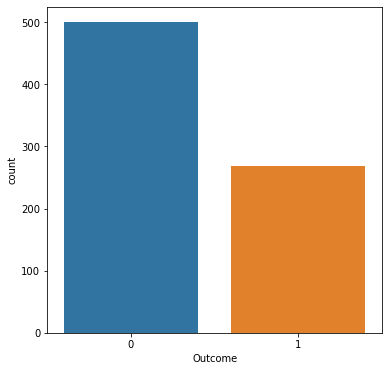

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(df.Outcome)
plt.show

In [ ]:
4] Applying various models to find out accuracy of dataset

In [34]:
x=df.drop(columns='Outcome',axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [35]:
y=df.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=34)

In [ ]:
a] K-N Neighbors classifier

In [37]:
train_accuracy=[]
test_accuracy=[]

n_neighbors_range = range(1,11)
for n_neighbors in n_neighbors_range:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))
    

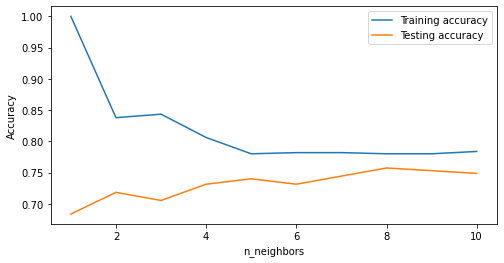

In [38]:
plt.figure(figsize=(8,4))

plt.plot(n_neighbors_range,train_accuracy,label="Training accuracy")
plt.plot(n_neighbors_range,test_accuracy,label="Testing accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [39]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [40]:
print("Accuracy of training data {:0.3f}".format(knn.score(x_train,y_train)))
print("Accuracy of testing data {:0.3f}".format(knn.score(x_test,y_test)))

Accuracy of training data 0.780
Accuracy of testing data 0.753


In [41]:
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("="*80)
print(classification_report(y_test,y_pred))

Accuracy score: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       152
           1       0.65      0.61      0.63        79

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [ ]:
b] Decision tree classifier

In [43]:
tree=DecisionTreeClassifier(max_depth=4,random_state=67)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)

In [44]:
print("Accuracy of training data {:0.3f}".format(tree.score(x_train,y_train)))
print("Accuracy of testing data {:0.3f}".format(tree.score(x_test,y_test)))

Accuracy of training data 0.808
Accuracy of testing data 0.710


In [45]:
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("="*80)
print(classification_report(y_test,y_pred))

Accuracy score: 0.70995670995671
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       152
           1       0.62      0.38      0.47        79

    accuracy                           0.71       231
   macro avg       0.68      0.63      0.64       231
weighted avg       0.70      0.71      0.69       231



In [ ]:
5] Feature importance

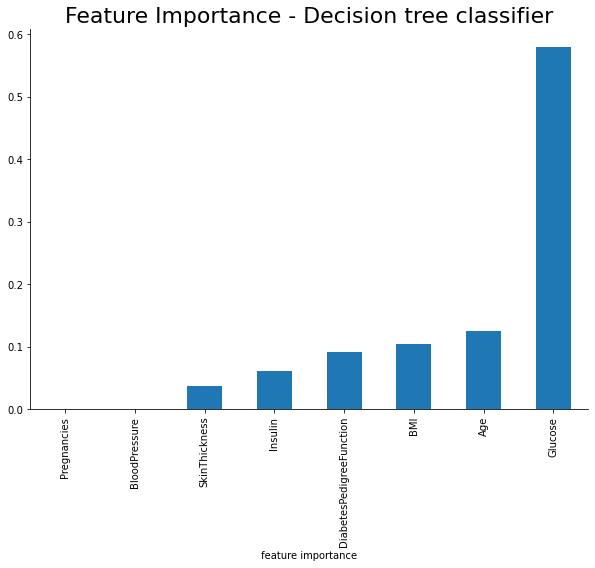

In [22]:
feat_import= pd.Series(tree.feature_importances_, index = x_train.columns)
ax = feat_import.sort_values(ascending = True).plot(kind = 'bar', figsize = (10, 7))
plt.title('Feature Importance - Decision tree classifier', fontsize = 22)
sns.despine()
plt.xlabel('feature importance')
plt.show()

So the Glucose feature is used the most to predict diabetes.